# Factor Analysis on Track Records

Factor analysis is not just a dimensionality reduction method; it is useful to find **latent** variables which are not directly measured in a single variable, but can be inferred from the vairables in the data set. The **latent** variables are called **factors**. 

---

## Notes on Differences between PCA and FA

Remember that PCA is a technique for reducing the dimensionality of data, whereas FA is a technique for identifying and measuring variables that cannot be measured directly (latent variables or factors). 

 - In PCA, the resulting components are a mix of what the variables intended to measure and other sources of variance such as measurement error. The variability in measured variables in PCA cause the variance in the principal components. 
 
 - In FA, latent factors are causing the variability and pattern of correlations among measured variables. 

Most multivariate data are correlated to some degree, so differences between PCA and FA may not be very distinct. Also, as the number of variables involved in the analysis grows, results from PCA and FA become more and more similar. Researchers have argued that analyses with at least 40 variables lead to minor differences. Also, if the communality of measured variables is high, then the results between PCA and EFA are also similar.

 - PCA is useful for reducing the number of variables while retaining the most amount of information in the data, whereas FA is useful for measuring unobserved (latent) variables.

 - When variables don’t have anything in common, FA won’t find a well-defined underlying factor, but PCA may still find a well-defined principal component that explains the maximal amount of variance in the data.

 - When the goal is to measure a latent variable but PCA is used, the component loadings will most likely be higher than they would’ve been if FA was used. This would mislead analysts into thinking they have a well-defined factor when in fact they have a well-defined component that’s a mixture of all the sources of variance in the data.

 - When the goal is to get a small subset of variables that retain the most amount of variability in the data but FA is used, the factor loadings will likely be lower than they would’ve been if PCA was used. This would mislead analysts into thinking they kept the maximal amount of variance in the data when in fact they kept the variance that’s in common across the measured variables.
 
 ---

In this notebook, we will do Factor Analysis on the National Track Records for Women data set reprsenting 55 countries in seven events. 
The description of the variables is following: 

 - X1: 100m (sec)
 - X2: 200m (sec)
 - X3: 400m (sec)
 - X4: 800m (min)
 - X5: 1500m (min)
 - X6: 3000m (min)
 - X7: Marathon (min)
 
 
 
We will do a factor analysis to see if there are factors that are represented by the variables in the data set. 

In [1]:
df = read.csv("women_track_records.csv")
head(df)
X = df[2:8]
head(X)

,COUNTRY,X1,X2,X3,X4,X5,X6,X7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Argentina,11.61,22.94,54.50,2.15,4.43,9.79,178.52
2,Australia,11.20,22.35,51.80,1.98,4.13,9.08,152.37
3,Austria,11.43,23.09,50.62,1.99,4.22,9.34,159.37
4,Belgium,11.41,23.04,52.00,2.00,4.14,8.88,157.85
5,Bermuda,11.46,23.05,53.30,2.16,4.58,9.81,169.98
6,Brazil,11.31,23.17,52.80,2.10,4.49,9.77,168.75


,X1,X2,X3,X4,X5,X6,X7
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.61,22.94,54.50,2.15,4.43,9.79,178.52
2,11.20,22.35,51.80,1.98,4.13,9.08,152.37
3,11.43,23.09,50.62,1.99,4.22,9.34,159.37
4,11.41,23.04,52.00,2.00,4.14,8.88,157.85
5,11.46,23.05,53.30,2.16,4.58,9.81,169.98
6,11.31,23.17,52.80,2.10,4.49,9.77,168.75


In [2]:
X.fa <- factanal(X,factors=2, rotation = "varimax")


In [3]:
X.fa


Call:
factanal(x = X, factors = 2, rotation = "varimax")

Uniquenesses:
   X1    X2    X3    X4    X5    X6    X7 
0.092 0.131 0.346 0.057 0.514 0.335 0.332 

Loadings:
   Factor1 Factor2
X1 0.442   0.844  
X2 0.438   0.823  
X3 0.622   0.517  
X4 0.885   0.399  
X5 0.585   0.379  
X6 0.714   0.395  
X7 0.680   0.454  

               Factor1 Factor2
SS loadings      2.873   2.321
Proportion Var   0.410   0.332
Cumulative Var   0.410   0.742

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 6.25 on 8 degrees of freedom.
The p-value is 0.62 

The **uniquenesses** ranges from 0 to 1 and sometimes is referred to as noise. It corresponds to the proportion of variability, which can not be explained by a linear combination of the factors. A high uniqueness for a variable indicates that the factors do not account well for its variance.


The **loadings** range from −1 to 1. The loadings are the contribution of each original variable to the factor. Variables with a high loading are well explained by the factor.

By squaring the loading, we compute the fraction of the variable’s total variance explained by the factor. This proportion of the variability is denoted as **communality**. Another way to calculate the **communality** is to subtract the uniquenesses from 1. **An appropriate factor model results in low values for uniqueness and high values for communality.**


In [4]:
1-X.fa$uniquenesses


X1        X2        X3        X4        X5        X6        X7 
0.9075204 0.8690338 0.6542516 0.9431641 0.4862271 0.6653994 0.6682614

The table beneath the loadings shows the proportion of variance explained by each factor. 

The row `Cumulative Var` gives the cumulative proportion of variance explained. These numbers range from 0 to 1. 
The row `Proportion Var` gives the proportion of variance explained by each factor, and the row `SS loadings` 
gives the sum of squared loadings. This is sometimes used to determine the value of a particular factor. 
**A factor is worth keeping if the SS loading is greater than 1 (Kaiser’s rule).**

The last section of the function output shows the results of a hypothesis test. The null hypothesis, H0, is that the number of factors in the model, in our example 2 factors, is sufficient to capture the full dimensionality of the data set. Conventionally, we reject H0 if the p-value is less than 0.05. Such a result indicates that the number of factors is too small. In contrast, we do not reject H0 if the p-value exceeds 0.05. Such a result indicates that there are likely enough (or more than enough) factors capture the full dimensionality of the data set. 

The high p-value in our example above leads us to not reject the H0, and indicates that we fitted an appropriate model.

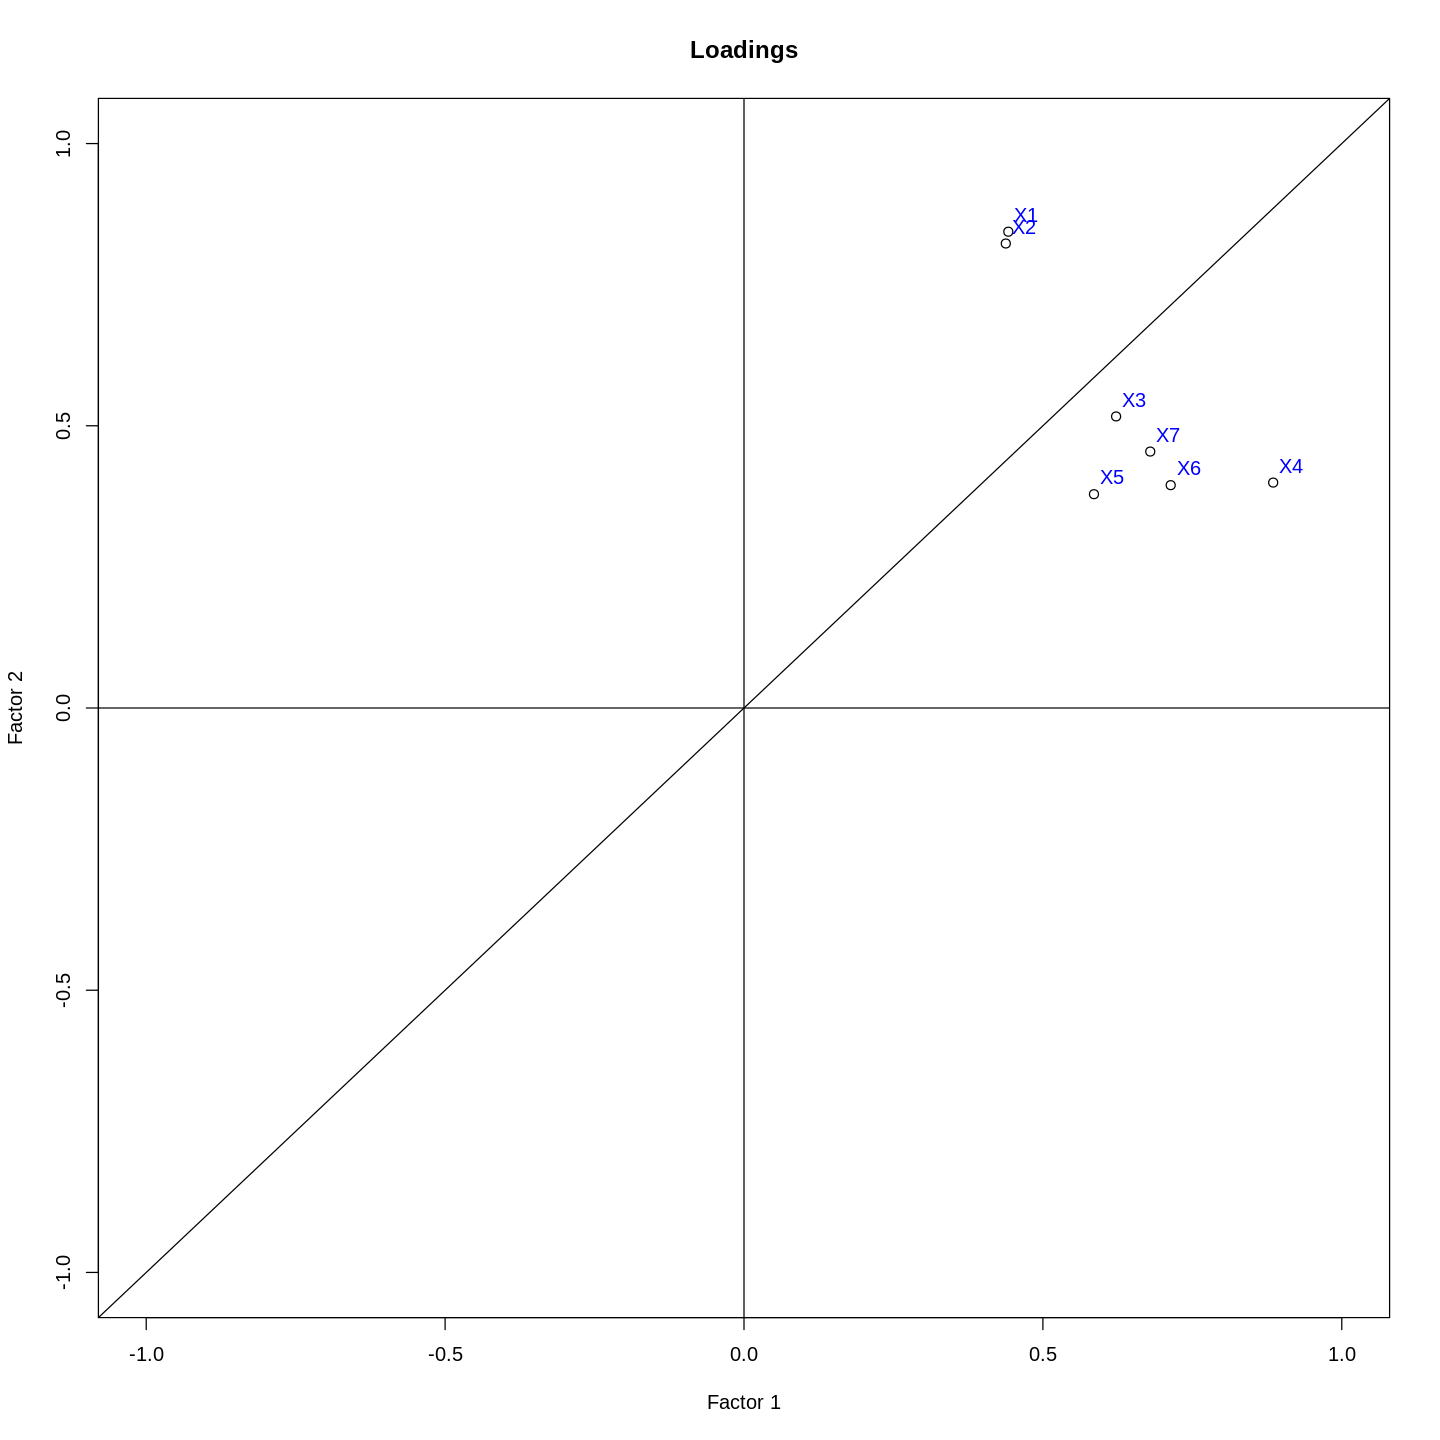

In [5]:
options(repr.plot.width=12, repr.plot.height=12)

plot(X.fa$loadings[,1], 
     X.fa$loadings[,2],
     xlab = "Factor 1", 
     ylab = "Factor 2", 
     ylim = c(-1,1),
     xlim = c(-1,1),
     main = "Loadings")

text(X.fa$loadings[,1]+0.03, 
     X.fa$loadings[,2]+0.03,
      colnames(df)[-1],
      col="blue")
abline(h = 0, v = 0)
abline(a=0, b=1)

### The Interpretation of Factors

The tricky aspect in factor analysis is interpreting the factors themselves. If two variables both have large loadings for the same factor, then we know they have something in common. As a data scientist, we have to understand the data and its meaning in order to give a name to that common ground. 

**In our data, variables X1, X2, X3 define Factor 2 (high loadings on Factor 2). Variables X3, X4, X5, X6, X7 define Factor 1.** 


To give names for the two factors, let’s focus on the domain knowledge of the field. In the given problem, the variables X1, X2, ..., X7 were the times recorded in seven events ranging from 100m to Marathon. 


Generally, in short-distance running (e.g. 100m, 200m, 400m), athletes should mainly focus on the speed. In long-distance running (e.g. 1500m, 3000m, Marathon), the athletes should mainly focus on tolerance or endurance. 

In our analysis, we can conclude that Factor 2 represents short-distance track records (since X1, X2 and X3 define Factor 2) and Factor 1 represents long-distance track records (since X4, X5, X6 and X7 define Factor 2). Therefore, we can give relevant names for the two factors as following:

 - Factor 1: tolerance or endurance factor
 - Factor 2: speed factor

But also note that the loadings for X3 are very close to each other. We can argue that the athletes who participated in 400m or 800m events should have maintained a good balance between speed and tolerance. So we can say that 400m seems to be influenced by both speed and endurance factors. Logic would suggest that 800m (X4) should have the same influence, but our analysis does not support that. It might be due to data sampling while creating the data set. 

These are the **actionable** insights that can be obtained by performing FA on this data set. 

